In [ ]:
# -*- coding: utf-8 -*-

# This driver performs 2-functions for the validation images specified in configuration file:
#     1) evaluate fscore of validation images.
#     2) stores the prediction results of the validation images.

In [1]:
import argparse
import json
import cv2
import numpy as np
from yolo.frontend import create_yolo
from yolo.backend.utils.box import draw_scaled_boxes
from yolo.backend.utils.annotation import parse_annotation
from yolo.backend.utils.eval.fscore import count_true_positives, calc_score

from pascal_voc_writer import Writer
from shutil import copyfile
import os
import yolo

C:\Users\ER9X\Anaconda3\envs\yolo\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ER9X\Anaconda3\envs\yolo\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ER9X\Anaconda3\envs\yolo\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ER9X\Anaconda3\envs\yolo\lib\site-packages\tensorflow\python\framework

In [ ]:
# DEFAULT_CONFIG_FILE = os.path.join(yolo.PROJECT_ROOT, "svhn", "config.json")
# DEFAULT_WEIGHT_FILE = os.path.join(yolo.PROJECT_ROOT, "svhn", "weights.h5")
# DEFAULT_THRESHOLD = 0.3

In [ ]:
def create_ann(filename, image, boxes, labels,label_list):
    copyfile(os.path.join('tests/dataset/svhn/numbers_pics',filename), 'imgs/'+filename)
    writer = Writer(os.path.join('tests/dataset/svhn/numbers_pics',filename), 224, 224)
    writer.addObject(label_list[labels[0]], boxes[0][0], boxes[0][1], boxes[0][2], boxes[0][3])
    name = filename.split('.')
    writer.save('ann/'+name[0]+'.xml')

In [2]:

with open("p9/config.json") as config_buffer:
    config = json.loads(config_buffer.read())

# 2. create yolo instance & predict
yolo = create_yolo(config['model']['architecture'],
                   config['model']['labels'],
                   config['model']['input_size'],
                   config['model']['anchors'])
yolo.load_weights("weights07381.h5")

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
mobilenet_0.75_224 (Model)   (None, 7, 7, 768)         1832976   
_________________________________________________________________
detection_layer_45 (Conv2D)  (None, 7, 7, 45)          34605     
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 5, 9)        0         
Total params: 1,867,581
Trainable params: 1,851,165
Non-trainable params: 16,416
_________________________________________________________________
Loading pre-trained weights in weights07381.h5


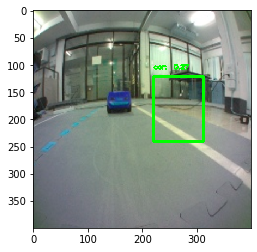

In [18]:
# netout = yolo_network.forward(image)
# boxes, probs = self._yolo_decoder.run(netout, threshold)

# if len(boxes) > 0:
#     boxes = _to_original_scale(boxes)
#     return boxes, probs
# else:
#     return [], []

import matplotlib.pyplot as plt
image = cv2.imread("lane/images/car14.jpg")
boxes, probs = yolo.predict(image, float(0.2))
# labels = np.argmax(probs, axis=1) if len(probs) > 0 else [] 

image = draw_scaled_boxes(image, boxes, probs, config['model']['labels'])
plt.imshow(image)

In [4]:
boxes

[]

In [3]:
import matplotlib.pyplot as plt
image = cv2.imread("lane/images/car1.jpg")
from yolo.backend.decoder import YoloDecoder
from yolo.backend.network import create_yolo_network
anchors = [0.57273, 0.677385, 1.87446, 2.06253, 3.33843, 5.47434, 7.88282, 3.52778, 9.77052, 9.16828]
n_classes = 5
n_boxes = int(len(anchors)/2)
input_size = 224
architecture = "MobileNet"
yolo_network = create_yolo_network(architecture, input_size, n_classes, n_boxes)

yolo_decoder = YoloDecoder(anchors)
def _to_original_scale(boxes):
    height, width = image.shape[:2]
    minmax_boxes = to_minmax(boxes)
    minmax_boxes[:,0] *= width
    minmax_boxes[:,2] *= width
    minmax_boxes[:,1] *= height
    minmax_boxes[:,3] *= height
    return minmax_boxes.astype(np.int)



Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
mobilenet_0.75_224 (Model)   (None, 7, 7, 768)         1832976   
_________________________________________________________________
detection_layer_50 (Conv2D)  (None, 7, 7, 50)          38450     
_________________________________________________________________
reshape_2 (Reshape)          (None, 7, 7, 5, 10)       0         
Total params: 1,871,426
Trainable params: 1,855,010
Non-trainable params: 16,416
_________________________________________________________________


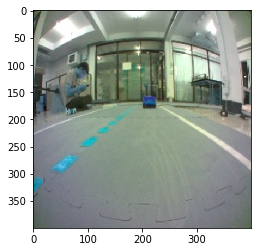

In [7]:
# netout = yolo_network.forward(image)
# boxes, probs = self._yolo_decoder.run(netout, threshold)

# if len(boxes) > 0:
#     boxes = _to_original_scale(boxes)
#     return boxes, probs
# else:
#     return [], []

boxes, probs = yolo.predict(image, float(0.3))
# labels = np.argmax(probs, axis=1) if len(probs) > 0 else [] 

image = draw_scaled_boxes(image, boxes, probs, config['model']['labels'])
plt.imshow(image)

In [16]:
netout

array([[[[ 3.34032960e-02,  1.50151998e-02,  2.76089478e-02, ...,
          -1.19886491e-02,  2.48716008e-02,  1.96689833e-03],
         [ 2.35370751e-02,  1.30633824e-02, -2.42583081e-02, ...,
           1.06026987e-02, -9.72971506e-03, -2.74973400e-02],
         [ 2.40785778e-02, -6.20813435e-03,  1.58517323e-02, ...,
           4.34687696e-02,  2.48906086e-03, -2.48371959e-02],
         [ 1.06883449e-02,  3.05675110e-03, -2.12428849e-02, ...,
          -2.06777975e-02, -3.24358940e-02, -2.54145581e-02],
         [-9.00226831e-03, -8.77717417e-03, -1.86786279e-02, ...,
          -4.34972811e-03, -4.76766704e-03,  2.10801163e-03]],

        [[ 5.93930483e-02, -1.56059144e-02, -3.44409049e-02, ...,
          -4.89099696e-02, -5.50882239e-03, -2.83983704e-02],
         [ 2.09614094e-02,  8.54794160e-02, -3.52219976e-02, ...,
           2.02365443e-02, -6.78848708e-03, -1.17235687e-02],
         [ 2.71545965e-02, -2.51085665e-02, -3.63095105e-02, ...,
           5.87370917e-02, -5.777561

In [4]:
boxes

array([[173,  84, 196, 118]])

In [5]:
probs

array([[0.      , 0.      , 0.688545, 0.      , 0.      ]], dtype=float32)